<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Endometrioid_Cancer_(UCEC)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.UCEC.sampleMap_HiSeqV2_PANCAN.gz  TCGA.UCEC.sampleMap_UCEC_clinicalMatrix


In [20]:
!pip install sparse_lmm

In [22]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.UCEC.sampleMap_UCEC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.UCEC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)


In [23]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_DNAMethyl_UCEC,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_UCEC,...,_GENOMIC_ID_TCGA_UCEC_miRNA_HiSeq,_GENOMIC_ID_TCGA_UCEC_exp_GAV2,_GENOMIC_ID_TCGA_UCEC_gistic2thd,_GENOMIC_ID_TCGA_UCEC_G4502A_07_3,_GENOMIC_ID_TCGA_UCEC_gistic2,_GENOMIC_ID_data/public/TCGA/UCEC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_UCEC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_UCEC_hMethyl450,_GENOMIC_ID_TCGA_UCEC_hMethyl27,_GENOMIC_ID_TCGA_UCEC_exp_GAV2_exon
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,Indeterminate,TCGA-2E-A9G8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-2E-A9G8-01,NaN,TCGA-2E-A9G8-01A-11D-A402-01,NaN,TCGA-2E-A9G8-01A-11D-A402-01,TCGA-2E-A9G8-01,TCGA-2E-A9G8-01,TCGA-2E-A9G8-01A-11D-A409-05,NaN,NaN
TCGA-4E-A92E-01,MSS,TCGA-4E-A92E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-4E-A92E-01,NaN,TCGA-4E-A92E-01A-11D-A37M-01,NaN,TCGA-4E-A92E-01A-11D-A37M-01,TCGA-4E-A92E-01,TCGA-4E-A92E-01,TCGA-4E-A92E-01A-11D-A37Q-05,NaN,NaN
TCGA-5B-A90C-01,MSS,TCGA-5B-A90C-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-5B-A90C-01,NaN,TCGA-5B-A90C-01A-11D-A37M-01,NaN,TCGA-5B-A90C-01A-11D-A37M-01,TCGA-5B-A90C-01,TCGA-5B-A90C-01,TCGA-5B-A90C-01A-11D-A37Q-05,NaN,NaN
TCGA-5S-A9Q8-01,MSS,TCGA-5S-A9Q8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-5S-A9Q8-01,NaN,TCGA-5S-A9Q8-01A-11D-A402-01,NaN,TCGA-5S-A9Q8-01A-11D-A402-01,TCGA-5S-A9Q8-01,TCGA-5S-A9Q8-01,TCGA-5S-A9Q8-01A-11D-A409-05,NaN,NaN
TCGA-A5-A0G1-01,MSI-H,TCGA-A5-A0G1-01,Quiet,C6-UCEC,UCEC non-CIMP c3,cluster 4,UCEC-like c5,UCEC-like c11,miRNA cluster 14,cluster 2,...,TCGA-A5-A0G1-01,c4bc1759-7de2-427c-a936-431f343ea929,TCGA-A5-A0G1-01A-11D-A120-01,NaN,TCGA-A5-A0G1-01A-11D-A120-01,TCGA-A5-A0G1-01,TCGA-A5-A0G1-01,TCGA-A5-A0G1-01A-11D-A123-05,NaN,c4bc1759-7de2-427c-a936-431f343ea929


In [24]:
# Display gene dataset
gene_data.head()

,TCGA-A5-A2K7-01,TCGA-FL-A1YI-11,TCGA-EO-A3AS-01,TCGA-EY-A549-01,TCGA-EO-A3B0-01,TCGA-KJ-A3U4-01,TCGA-EY-A2OQ-01,TCGA-PG-A7D5-01,TCGA-B5-A0JN-01,TCGA-FL-A1YU-11,...,TCGA-D1-A3DA-01,TCGA-KP-A3W3-01,TCGA-AJ-A3IA-01,TCGA-AJ-A8CW-01,TCGA-H5-A2HR-01,TCGA-EY-A547-01,TCGA-FL-A1YV-11,TCGA-BK-A6W3-01,TCGA-BK-A56F-01,TCGA-EO-A3AY-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.033992,0.180208,-0.826192,-0.736292,-2.025392,-0.081192,-1.068392,-1.211492,-0.320192,-0.429692,...,-2.175492,-0.853592,1.326408,-1.762692,-2.573492,-1.060992,0.031708,-0.511492,-0.078592,-0.811292
HIF3A,-1.223126,0.177574,1.394374,-3.098826,-2.132926,0.963374,1.065174,4.560774,4.335374,0.004474,...,0.164374,1.392574,2.820074,-0.594626,0.187374,0.288874,2.975574,-5.554726,-2.382626,-4.858826
RNF17,0.021565,0.388665,0.623265,0.864865,-0.531035,0.191265,-0.531035,-0.056235,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.075365,-0.531035,-0.531035,-0.023335,-0.531035
RNF10,0.131928,0.113528,-0.674772,0.069228,-1.730572,0.753428,-0.088272,0.310428,-0.404072,0.085028,...,0.324828,0.374528,0.155428,0.232928,0.333328,-0.196272,-0.015872,0.207228,-0.087972,0.444328
RNF11,-1.084278,0.841122,0.452222,-0.060678,-0.507378,-0.148578,-1.010478,-0.687778,-0.316878,-0.230478,...,-0.116778,0.330222,-0.106878,-0.629278,-2.788478,-0.474078,0.259422,-0.573678,-0.487378,-2.417778


In [26]:
# Set Basic info

trait = 'Endometrioid_Cancer'
condition = 'Inflammation'
condition_col = 'EGFR'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')


The clinical dataset has 123 features, and the gene dataset includes 20530 genes


In [27]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_DNAMethyl_UCEC,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_UCEC,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,Indeterminate,TCGA-2E-A9G8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288
TCGA-4E-A92E-01,MSS,TCGA-4E-A92E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,MSS,TCGA-5B-A90C-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,MSS,TCGA-5S-A9Q8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A0G1-01,MSI-H,TCGA-A5-A0G1-01,Quiet,C6-UCEC,UCEC non-CIMP c3,cluster 4,UCEC-like c5,UCEC-like c11,miRNA cluster 14,cluster 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,EGFR,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,-2.940927,-1.175592,0.864474,-0.531035,0.426928,-0.601278,-1.67421,0.080406,-1.766546,-0.423399,...,-0.748878,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288
TCGA-4E-A92E-01,0.603873,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,-1.994727,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,-3.190227,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A1OH-01,-2.092827,-1.823192,5.243674,-0.531035,-0.365172,-0.476078,-0.72361,0.165706,0.470854,-0.423399,...,0.330522,0.758183,0.961667,3.00791,0.208623,0.436514,0.311373,-1.538495,-0.985533,-0.116212


In [29]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,EGFR,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Endometrioid_Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,-2.940927,-1.175592,0.864474,-0.531035,0.426928,-0.601278,-1.67421,0.080406,-1.766546,-0.423399,...,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288,1
TCGA-4E-A92E-01,0.603873,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012,1
TCGA-5B-A90C-01,-1.994727,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388,1
TCGA-5S-A9Q8-01,-3.190227,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988,1
TCGA-A5-A1OH-01,-2.092827,-1.823192,5.243674,-0.531035,-0.365172,-0.476078,-0.72361,0.165706,0.470854,-0.423399,...,0.758183,0.961667,3.00791,0.208623,0.436514,0.311373,-1.538495,-0.985533,-0.116212,1


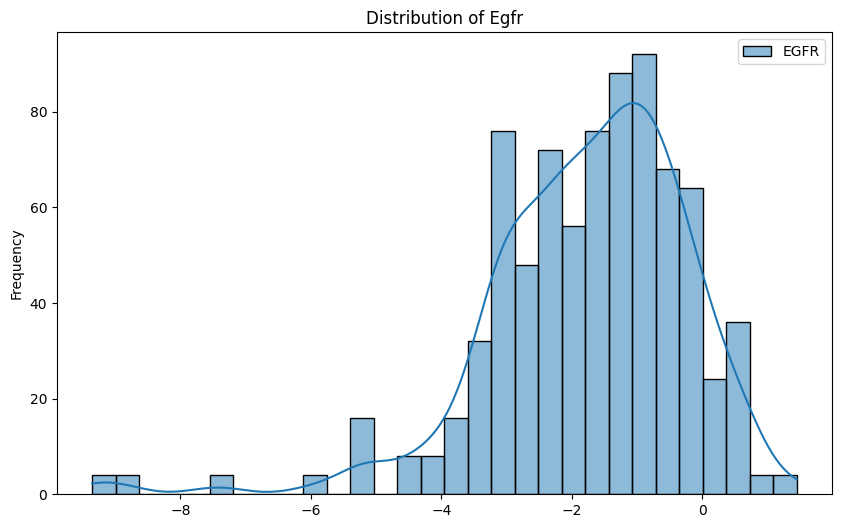

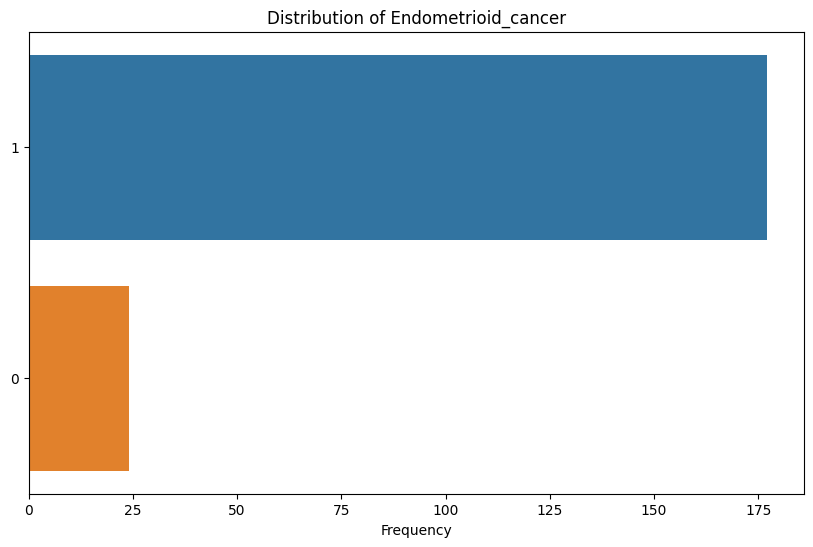

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'EGFR' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [31]:
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,Inflammation,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Endometrioid_Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,-2.940927,-1.175592,0.864474,-0.531035,0.426928,-0.601278,-1.67421,0.080406,-1.766546,-0.423399,...,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288,1
TCGA-4E-A92E-01,0.603873,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012,1
TCGA-5B-A90C-01,-1.994727,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388,1
TCGA-5S-A9Q8-01,-3.190227,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988,1
TCGA-A5-A1OH-01,-2.092827,-1.823192,5.243674,-0.531035,-0.365172,-0.476078,-0.72361,0.165706,0.470854,-0.423399,...,0.758183,0.961667,3.00791,0.208623,0.436514,0.311373,-1.538495,-0.985533,-0.116212,1


In [32]:

import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [33]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-32-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-32-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-32-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 64.42% ± 8.75%


In [34]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-32-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [35]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: Inflammation
Coefficient: -0.0157
p-value: 0.3305



In [36]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)


Genes with corrected p-value < 0.05, affecting the trait Endometrioid_Cancer conditional on the factor Inflammation, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
   RBMY1A3P     0.440299      6.569495e-124
      OR5W2     0.440299      6.569495e-124
     OR2T29     0.440299      6.569495e-124
       CDY1    -0.440299      6.569495e-124
   SNORD88C    -0.440299      6.569495e-124
  KRTAP20-3     0.440299      6.569495e-124
        NMS    -0.440299      6.569495e-124
    GLYCAM1     0.440299      6.569495e-124
     SNAR-D    -0.440299      6.569495e-124
     OR10Z1    -0.440299      6.569495e-124
    DEFB128     0.440299      6.569495e-124
    DEFB122     0.440299      6.569495e-124
     SPINT4     0.440299      6.569495e-124
      OR5M8     0.440299      6.569495e-124
    SNORD90    -0.440299      6.569495e-124
    SNORA30     0.440299      6.569495e-124
    DEFB110    -0.440299      6.569495e-124
    SNORA35    -0.440299      6.569495e-124
SNORD116-19     0.